# Benchmarking to Jorgenson 2022
- This notebook benchmarks approximatly to the R scripst of Jorgenson. We would not expect the answers to be the same, but the statistics should be broadly similar
- This notebook uses functions without normalization (e..g standard scalar), following Jorgenson
- The only other difference is we don't include NiO in the liquid or Cpx, or P2O5 in the Cpx. This is because the vast majority of the calibration dataset has no data for these elements
(3.8% for Ni in cpx, 5.6 % for P2O5 in Cpx, and 4.4 % for Ni in Liq)
- Very spare data can cause issues for regression trees (see Wieser et al. in review for most discussion), and our R2 values are better than the R version, so we feel this decision is jusified. 
- You have to enter a local file path where you have downloaded the onnx files. 

# How to install Thermobar_onnx

In [1]:
#!pip install "https://github.com/PennyWieser/Thermobar_onnx/archive/refs/tags/0.0.1dev.zip"

In [2]:
import Thermobar as pt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

## Load in test dataset

In [3]:
out_test=pt.import_excel('Jorgenson_Test_dataset.xlsx',
                          sheet_name='Data_For_Corin_Thermobar')
out_test_input=out_test['my_input']
Cpx_test=out_test['Cpxs']
Liq_test=out_test['Liqs']

c:\users\penny\onedrive - oregon state university\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\import_export.py:373: UserWarning: You've got a column heading with a lower case _liq, this is okay if this column is for your own use, but if its an input to Thermobar, it needs to be capitalized (_Liq)
  w.warn("You've got a column heading with a lower case _liq, this is okay if this column is for your"


In [4]:
P_Calc_CL=pt.calculate_cpx_liq_press(cpx_comps=Cpx_test, liq_comps=Liq_test, 
equationP="P_Petrelli2020_Cpx_Liq_onnx")

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
P_Calc_CL_J=pt.calculate_cpx_liq_press(cpx_comps=Cpx_test, liq_comps=Liq_test, 
equationP="P_Jorgenson2022_Cpx_Liq_onnx")

Im normalizing using the Jorgenson method, e.g. 100 total, 2dp


In [10]:
P_Calc_CL_J=pt.calculate_cpx_only_press(cpx_comps=Cpx_test, 
equationP="P_Petrelli2020_Cpx_only_onnx")

In [11]:
P_Calc_CL_J=pt.calculate_cpx_only_press(cpx_comps=Cpx_test, 
equationP="P_Jorgenson2022_Cpx_only_onnx")

## Comparing Petrelli and Jorgenson

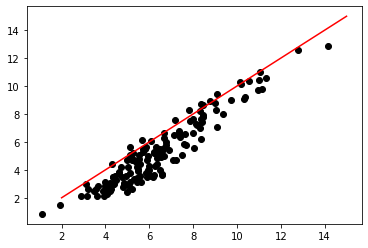

In [7]:
plt.plot(P_Calc_CL ,P_Calc_CL_J, 'ok')
plt.plot([2, 15], [2, 15], '-r')

## Cpx-Liq barometer

Im normalizing using the Jorgenson method, e.g. 100 total, 2dp


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


R2 Thermobar=0.42
RMSE Thermobar=2.30
Mean offset Thermobar=0.30
R2 R=0.30
RMSE R=2.81
Mean offset R=-0.64


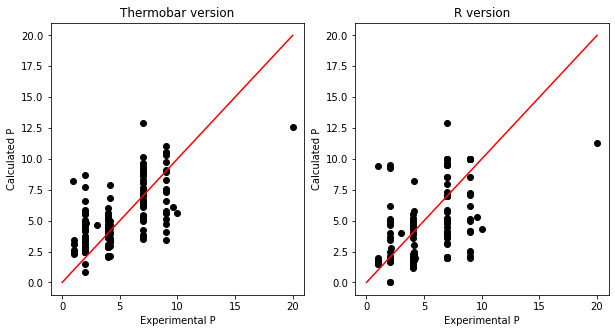

In [8]:
P_Calc_CL=pt.calculate_cpx_liq_press(cpx_comps=Cpx_test, liq_comps=Liq_test, 
equationP="P_Jorgenson2022_Cpx_Liq_onnx")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('Thermobar version')
ax1.plot(out_test_input['P_kbar_x'], P_Calc_CL, 'ok')
ax1.plot([0, 20], [0, 20], '-r')
Stats=pt.calculate_R2(out_test_input['P_kbar_x'], P_Calc_CL)
print('R2 Thermobar='+str(Stats['R2']))
print('RMSE Thermobar='+str(Stats['RMSE']))
print('Mean offset Thermobar='+str(Stats['Mean']))
ax1.set_xlabel('Experimental P')
ax1.set_ylabel('Calculated P')


ax2.set_title('R version')
ax2.set_xlabel('Experimental P')
ax2.set_ylabel('Calculated P')
ax2.plot(out_test_input['P_kbar_x'], out_test_input['P_values_liq'], 'ok')
ax2.plot([0, 20], [0, 20], '-r')
Stats=pt.calculate_R2(out_test_input['P_kbar_x'], out_test_input['P_values_liq'])
print('R2 R='+str(Stats['R2']))
print('RMSE R='+str(Stats['RMSE']))
print('Mean offset R='+str(Stats['Mean']))

## Cpx-Liq thermometer

Im normalizing using the Jorgenson method, e.g. 100 total, 2dp


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


R2 Thermobar=0.82
RMSE Thermobar=48.97
Mean offset Thermobar=28.51
R2 R=0.80
RMSE R=47.69
Mean offset R=22.80


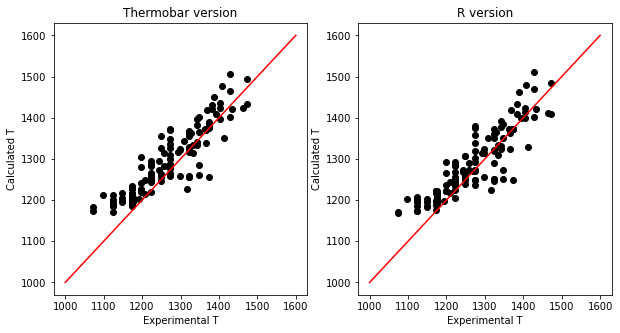

In [9]:
T_Calc_CL=pt.calculate_cpx_liq_temp(cpx_comps=Cpx_test, liq_comps=Liq_test, 
equationT="T_Jorgenson2022_Cpx_Liq_onnx")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('Thermobar version')
ax1.plot(out_test_input['T_K_x'], T_Calc_CL, 'ok')
ax1.plot([1000, 1600], [1000, 1600], '-r')
Stats=pt.calculate_R2(out_test_input['T_K_x'], T_Calc_CL)
print('R2 Thermobar='+str(Stats['R2']))
print('RMSE Thermobar='+str(Stats['RMSE']))
print('Mean offset Thermobar='+str(Stats['Mean']))

ax1.set_xlabel('Experimental T')
ax1.set_ylabel('Calculated T')


ax2.set_title('R version')
ax2.set_xlabel('Experimental T')
ax2.set_ylabel('Calculated T')
ax2.plot(out_test_input['T_K_x'], out_test_input['T_values_liq']+273.15, 'ok')
ax2.plot([1000, 1600], [1000, 1600], '-r')
Stats=pt.calculate_R2(out_test_input['T_K_x'], out_test_input['T_values_liq']+273.15)
print('R2 R='+str(Stats['R2']))
print('RMSE R='+str(Stats['RMSE']))
print('Mean offset R='+str(Stats['Mean']))

## Cpx only barometer

R2 Thermobar=0.40
RMSE Thermobar=2.39
Mean offset Thermobar=0.09
R2 R=0.33
RMSE R=2.74
Mean offset R=-0.68


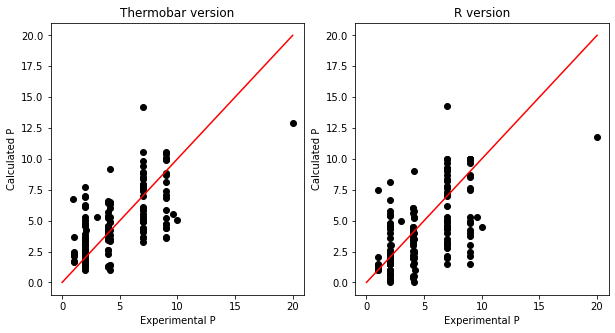

In [10]:
P_Calc_C=pt.calculate_cpx_only_press(cpx_comps=Cpx_test, 
equationP="P_Jorgenson2022_Cpx_only_onnx")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('Thermobar version')
ax1.plot(out_test_input['P_kbar_x'], P_Calc_C, 'ok')
ax1.plot([0, 20], [0, 20], '-r')
Stats=pt.calculate_R2(out_test_input['P_kbar_x'], P_Calc_C)
print('R2 Thermobar='+str(Stats['R2']))
print('RMSE Thermobar='+str(Stats['RMSE']))
print('Mean offset Thermobar='+str(Stats['Mean']))
ax1.set_xlabel('Experimental P')
ax1.set_ylabel('Calculated P')


ax2.set_title('R version')
ax2.set_xlabel('Experimental P')
ax2.set_ylabel('Calculated P')
ax2.plot(out_test_input['P_kbar_x'], out_test_input['P_values_noliq'], 'ok')
ax2.plot([0, 20], [0, 20], '-r')
Stats=pt.calculate_R2(out_test_input['P_kbar_x'], out_test_input['P_values_noliq'])
print('R2 R='+str(Stats['R2']))
print('RMSE R='+str(Stats['RMSE']))
print('Mean offset R='+str(Stats['Mean']))

##  Cpx only thermometer

R2 Thermobar=0.46
RMSE Thermobar=119.64
Mean offset Thermobar=97.13
R2 R=0.42
RMSE R=112.28
Mean offset R=85.31


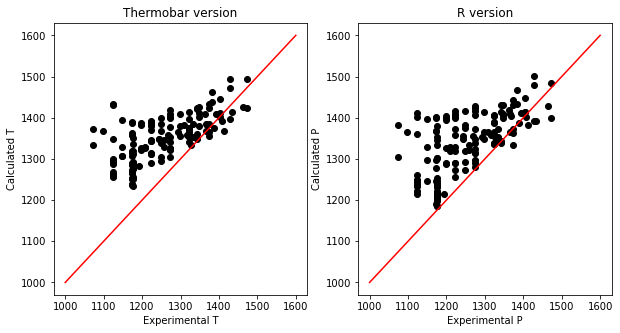

In [12]:
T_Calc_C=pt.calculate_cpx_only_temp(cpx_comps=Cpx_test,
equationT="T_Jorgenson2022_Cpx_only_onnx")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('Thermobar version')
ax1.plot(out_test_input['T_K_x'], T_Calc_C, 'ok')
ax1.plot([1000, 1600], [1000, 1600], '-r')
Stats=pt.calculate_R2(out_test_input['T_K_x'], T_Calc_C)
print('R2 Thermobar='+str(Stats['R2']))
print('RMSE Thermobar='+str(Stats['RMSE']))
print('Mean offset Thermobar='+str(Stats['Mean']))
ax1.set_xlabel('Experimental T')
ax1.set_ylabel('Calculated T')


ax2.set_title('R version')
ax2.set_xlabel('Experimental P')
ax2.set_ylabel('Calculated P')
ax2.plot(out_test_input['T_K_x'], out_test_input['T_values_noliq']+273.15, 'ok')
ax2.plot([1000, 1600], [1000, 1600], '-r')
Stats=pt.calculate_R2(out_test_input['T_K_x'], out_test_input['T_values_noliq']+273.15)
print('R2 R='+str(Stats['R2']))
print('RMSE R='+str(Stats['RMSE']))
print('Mean offset R='+str(Stats['Mean']))

In [13]:
PT_Calc_C=pt.calculate_cpx_only_press_temp(cpx_comps=Cpx_test,
equationT="T_Jorgenson2022_Cpx_only_onnx", equationP="P_Jorgenson2022_Cpx_only_onnx")


Youve selected a P-independent function
Youve selected a T-independent function


In [14]:
PT_Calc_CL=pt.calculate_cpx_liq_press_temp(cpx_comps=Cpx_test,liq_comps=Liq_test,
equationT="T_Jorgenson2022_Cpx_Liq_onnx", equationP="P_Jorgenson2022_Cpx_Liq_onnx")


Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Youve selected a P-independent function


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Youve selected a T-independent function
Youve selected a T-independent function


In [15]:
PT_Calc_CL

,P_kbar_calc,T_K_calc
0,4.684525,1382.368896
1,5.266253,1423.358887
2,5.255477,1408.274292
3,5.302085,1397.881470
4,5.505522,1373.945923
...,...,...
142,4.202968,1348.960815
143,2.646567,1295.717041
144,2.862119,1288.072754
145,3.763875,1282.821533
